In [1]:
import numpy as np
import matplotlib.pyplot as plt

from torchvision import datasets, transforms

from collections import Counter

### Import the MNIST-datasets.

In [2]:
DOWNLOAD_DIRECTORY = "./datasets"

# Specify transformations on load
transform = transforms.ToTensor()

dataset_train = datasets.MNIST(root=DOWNLOAD_DIRECTORY, train=True, download=True, transform=transform)
dataset_test = datasets.MNIST(root=DOWNLOAD_DIRECTORY, train=False, download=True, transform=transform)

### Inspect the datasets.

Training set size: 60000
Test set size: 10000

Datapoint shape: torch.Size([28, 28])
Label shape: torch.Size([])

Classes: ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
Class frequencies: [(0, 5923), (1, 6742), (2, 5958), (3, 6131), (4, 5842), (5, 5421), (6, 5918), (7, 6265), (8, 5851), (9, 5949)]


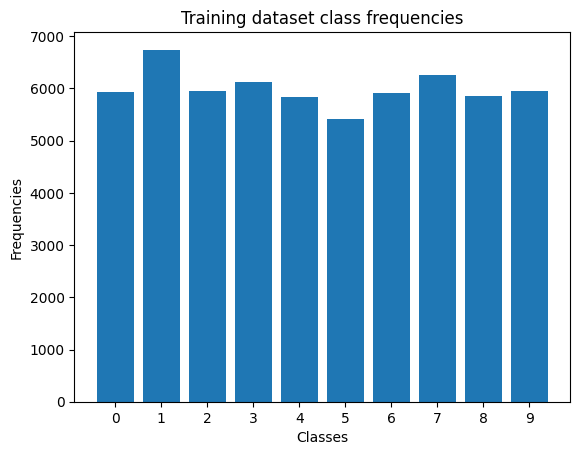

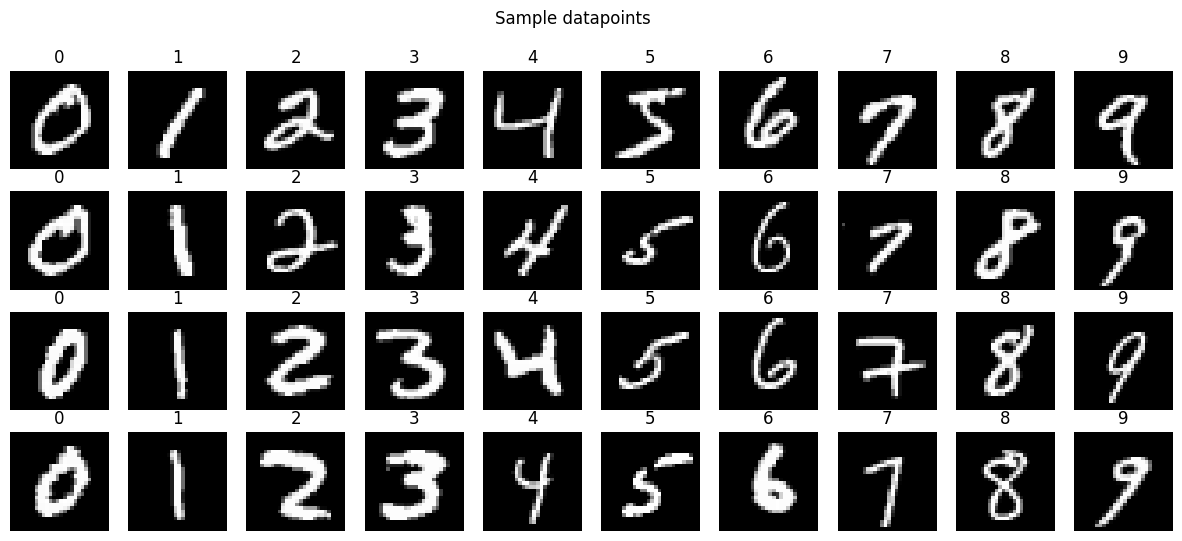

In [3]:
# Dataset sizes
print("Training set size:", len(dataset_train.data))
print("Test set size:", len(dataset_test.data))

# Datapoint information
print("\nDatapoint shape:", dataset_train.data[0].shape)
print("Label shape:", dataset_train.targets[0].shape)

# Class frequencies
class_frequencies = sorted(Counter(label.item() for label in dataset_train.targets).items())
print("\nClasses:", dataset_train.classes)
print("Class frequencies:", class_frequencies)

# Barplot the different class frequencies
x_values = np.array(class_frequencies)[:, 0]
height_values = np.array(class_frequencies)[:, 1]
plt.title("Training dataset class frequencies")
plt.bar(x_values, height_values)
plt.xticks(x_values)
plt.xlabel("Classes")
plt.ylabel("Frequencies")
plt.show()

# Plot several sample images of each class
no_images = 4
sample_data = [[(image, label) for _, (image, label) in zip(range(no_images), ((image, label) for image, label in dataset_train if label == i))] for i in range(10)]

fig, axes = plt.subplots(nrows=no_images, ncols=10, figsize=(15, 6))
fig.suptitle("Sample datapoints")
for i, ax in enumerate(axes.flatten()):
    image, label = sample_data[i % 10][i // 10]
    ax.imshow(image.permute((1, 2, 0)), cmap="gray")
    ax.set_title(label)
    ax.set_axis_off()